# Week 7 - Class

This notebook starts with some useful code for visualising graphs and running Dijkstra's algorithm. The questions are in the section [Questions](#Questions) below.

## Useful code

In [2]:
!pip3 install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [3]:
%matplotlib inline
import networkx as nx
import random
from collections import defaultdict
import math
import matplotlib.pyplot as plt
infinity = float('inf')

In [4]:
def visualise(G, W, layout=nx.spring_layout):
    G_out = nx.DiGraph()
    for u in G.keys():
        G_out.add_node(str(u))
        for v in G[u]:
            G_out.add_edge(str(u), str(v), weight=str(W[u, v]))
    pos = layout(G_out)
    nx.draw_networkx(G_out, pos=pos)
    nx.draw_networkx_edge_labels(G_out, pos=pos, edge_labels=W)

def graph_from_edges(edges):
    # assume edges = list of triples (u, v, w)
    nodes = sorted(list(set([u for u, v, w in edges]+[v for u, v, w in edges])))
    G = defaultdict(list)
    W = {}
    for u, v, w in edges:
        G[u].append(v)
        W[u, v] = w
    return G, W

In [5]:
def dijkstra(G, W, start):
    predecessor = {start: None}   # predecessor subgraph (start has no predecessor)
    q = {start: 0}                # priority queue for next vertices, distance to start is 0
    shortest = {}                 # shortest paths found (none at the start)
    # Repeatedly evaluate this cell until it says Finished!
    while q: # are there any vertices to add?
        # Find the lowest priority (note: this is where the data structure is inefficient!)
        d, vertex = min((d, vertex) for vertex, d in q.items())
        del q[vertex]
        # Add this to the set of vertices we've finished processing
        shortest[vertex] = d
        # Now update the list of candidate vertices by iterating through its neighbours
        for next_vertex in G[vertex]:
            if next_vertex in shortest: # don't add ones we've already finished with
                continue
            c = q.get(next_vertex, infinity) # get the current best found if there is one, or infinity if not
            e = d+W[vertex, next_vertex] # distance to next_vertex if you take this route
            if e<c: # if it's better, replace it in the queue and predecessor subgraph
                q[next_vertex] = e
                predecessor[next_vertex] = vertex
    return shortest, predecessor

def shortest_path_subgraph(G, W, target, predecessor):
    SG = {}
    SW = {}
    while predecessor[target] is not None:
        source = predecessor[target]
        SG[source] = [target]
        SW[source, target] = W[source, target]
        target = source
    return SG, SW

## Questions

### Give an example to show that Dijkstra's algorithm fails on graphs if you allow negative weights. Why does it fail?

For this tree the answer should be 3 but Dijkstra already stops when we reach node B.

({'A': 0, 'B': 5, 'C': 6}, {'A': None, 'B': 'A', 'C': 'A'})

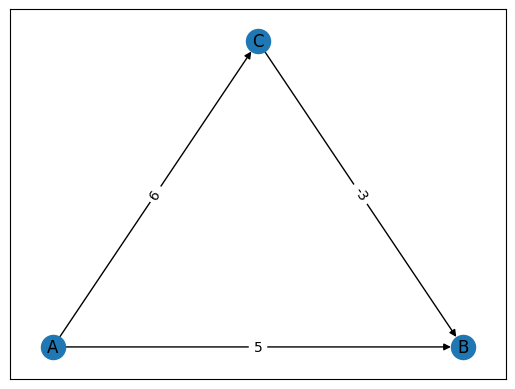

In [6]:
edges_problematic0 = [
    ('A', 'B', 5),
    ('A', 'C', 6),
    ('C', 'B', -3)
]
G, W = graph_from_edges(edges_problematic0)
visualise(*graph_from_edges(edges_problematic0), layout=nx.planar_layout)
distances = dijkstra(G, W, 'A')
distances

### What is the shortest (weighted) path from A to D in the graph below?

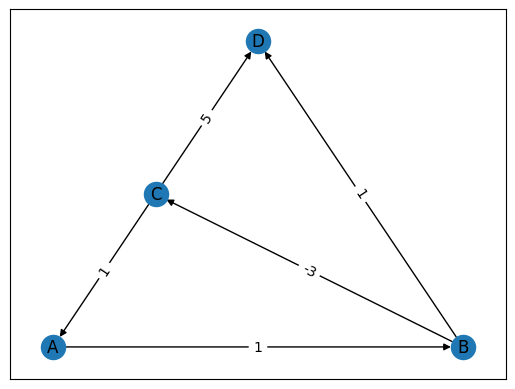

In [7]:
edges_problematic = [
    ('A', 'B', 1),
    ('B', 'C', -3),
    ('C', 'A', 1),
    ('B', 'D', 1),
    ('C', 'D', 5),
]
visualise(*graph_from_edges(edges_problematic), layout=nx.planar_layout)

In [8]:
G, W = graph_from_edges(edges_problematic)
distances = dijkstra(G, W, 'A')
distances

({'A': 0, 'B': 1, 'C': -2, 'D': 2}, {'A': None, 'B': 'A', 'C': 'B', 'D': 'B'})

### Design an algorithm (using the hints below) that can find the shortest paths from a single source to all destinations even if negative weights are allowed, and will raise an error if this cannot be done. Verify that this works on your example, and the example given above.

You should use the following data structures. The map ``shortest[v]`` stores the current best distance from the start to the vertex ``v``. The map ``predecessor[v]`` gives the previous vertex on the path from the start vertex to ``v`` for the shortest path found so far (assuming such a path has been found).

The relaxation operation on an edge $(u, v)$ with weight $w$ should check if the shortest path found so far from the start to $u$ and then from $u$ to $v$ is better than the shortest path found so far from the start to $v$, and if so, update the data structures. This operation is also used in Dijkstra's algorithm.

What happens if you relax every edge in the graph?

How many times should you do this? Think about the largest number of possible vertices in a shortest weighted path in the graph.

How can you detect if there is a problem?

In [9]:
def check_loop(vertex, predecessors):
    tmp_vert = vertex
    while (tmp_vert != None):
        tmp_vert = predecessors[tmp_vert]
        if (tmp_vert == vertex):
            return True
    return False

def dijkstra_neg(G, W, start):
    predecessor = {start: None}   # predecessor subgraph (start has no predecessor)
    q = {start: 0}                # priority queue for next vertices, distance to start is 0
    shortest = {}                 # shortest paths found (none at the start)
    prev_shortest = {}
    vert_count = 0
    print(len(G))
    
    while q: # are there any vertices to add?
        # Find the lowest priority (note: this is where the data structure is inefficient!)
        d, vertex = min((d, vertex) for vertex, d in q.items())
        del q[vertex]
        # Add this to the set of vertices we've finished processing
        prev_shortest = shortest.copy()
        shortest[vertex] = d
        # Now update the list of candidate vertices by iterating through its neighbours
        for next_vertex in G[vertex]:
            c = q.get(next_vertex, infinity) # get the current best found if there is one, or infinity if not
            e = d+W[vertex, next_vertex] # distance to next_vertex if you take this route
            if e<c: # if it's better, replace it in the queue and predecessor subgraph
                q[next_vertex] = e
                predecessor[next_vertex] = vertex
                # if (check_loop(next_vertex, predecessor)):
                #     print("Can't solve this")
                #     return None, None
        
        print(vert_count, prev_shortest, shortest)
        if (vert_count == 5) and (prev_shortest != shortest):
            print("fail")
            return None, None
        vert_count += 1
        if (vert_count == 6):
            break
    return shortest, predecessor

In [35]:
def bellmann_ford(G, W, start):
    distances = defaultdict(lambda: infinity)
    distances[start] = 0
    #covered = defaultdict(lambda: None)
    for q in range(len(G) - 1):
        for (i, j), v in W.items():
            dist = distances[i] + v
            if dist < distances[j]:
                distances[j] = dist
        
    next_distances = distances.copy()
    for (i, j), v in W.items():
        dist = next_distances[i] + v
        if dist < next_distances[j]:
            next_distances[j] = dist
    if next_distances != distances:
        raise ValueError("Cycle detected in input graph")
    return distances

In [36]:
G, W = graph_from_edges(edges_problematic)
G2, W2 = graph_from_edges(edges_problematic0)
bellmann_ford(G, W, 'A')
bellmann_ford(G2, W2, 'A')

0 defaultdict(<function bellmann_ford.<locals>.<lambda> at 0x7f5797df5fc0>, {'A': -1, 'B': 1, 'C': -2, 'D': 2})
1 defaultdict(<function bellmann_ford.<locals>.<lambda> at 0x7f5797df5fc0>, {'A': -2, 'B': 0, 'C': -3, 'D': 1})


ValueError: Cycle detected in input graph

In [53]:
G, W = graph_from_edges(edges_problematic)
print(G)
print(W)
distances = dijkstra_neg(G, W, 'A')
distances

defaultdict(<class 'list'>, {'A': ['B'], 'B': ['C', 'D'], 'C': ['A', 'D']})
{('A', 'B'): 1, ('B', 'C'): -3, ('C', 'A'): 1, ('B', 'D'): 1, ('C', 'D'): 5}
3
0 {} {'A': 0}
1 {'A': 0} {'A': 0, 'B': 1}
2 {'A': 0, 'B': 1} {'A': 0, 'B': 1, 'C': -2}
3 {'A': 0, 'B': 1, 'C': -2} {'A': -1, 'B': 1, 'C': -2}
4 {'A': -1, 'B': 1, 'C': -2} {'A': -1, 'B': 0, 'C': -2}
5 {'A': -1, 'B': 0, 'C': -2} {'A': -1, 'B': 0, 'C': -3}
fail


(None, None)

In [54]:
G, W = graph_from_edges(edges_problematic0)
print(W)
distances = dijkstra_neg(G, W, 'A')
distances

{('A', 'B'): 5, ('A', 'C'): 6, ('C', 'B'): -3}
2
0 {} {'A': 0}
1 {'A': 0} {'A': 0, 'B': 5}
2 {'A': 0, 'B': 5} {'A': 0, 'B': 5, 'C': 6}
3 {'A': 0, 'B': 5, 'C': 6} {'A': 0, 'B': 3, 'C': 6}


({'A': 0, 'B': 3, 'C': 6}, {'A': None, 'B': 'C', 'C': 'A'})

### What is the complexity of this algorithm?